# **Loan Clasification**

In [4]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn.metrics import classification_report
import warnings 
warnings.filterwarnings('ignore')

## **Fase 1: Definición del problema y recopilación de datos**

In [5]:
url='loan_data.csv'
df=pd.read_csv(url,sep=',')
df.head()

,person_age,person_gender,person_education,person_income,person_emp_exp,person_home_ownership,loan_amnt,loan_intent,loan_int_rate,loan_percent_income,cb_person_cred_hist_length,credit_score,previous_loan_defaults_on_file,loan_status
0,22.0,female,Master,71948.0,0,RENT,35000.0,PERSONAL,16.02,0.49,3.0,561,No,1
1,21.0,female,High School,12282.0,0,OWN,1000.0,EDUCATION,11.14,0.08,2.0,504,Yes,0
2,25.0,female,High School,12438.0,3,MORTGAGE,5500.0,MEDICAL,12.87,0.44,3.0,635,No,1
3,23.0,female,Bachelor,79753.0,0,RENT,35000.0,MEDICAL,15.23,0.44,2.0,675,No,1
4,24.0,male,Master,66135.0,1,RENT,35000.0,MEDICAL,14.27,0.53,4.0,586,No,1


In [6]:
# Removing duplicate rows
df.drop_duplicates(inplace=True)

duplicate_count = df.duplicated().sum()

if duplicate_count == 0:
    print("No duplicate values in the dataset.")
else:
    print(f"Total duplicate values remaining: {duplicate_count}")

No duplicate values in the dataset.


In [7]:
print(f"Numero de filas y columnas : \n {df.shape}")
print(f"Numero de totales : \n {df.isnull().sum().sum()}")

Numero de filas y columnas : 
 (45000, 14)
Numero de totales : 
 0


In [8]:
df.isnull().sum()

person_age                        0
person_gender                     0
person_education                  0
person_income                     0
person_emp_exp                    0
person_home_ownership             0
loan_amnt                         0
loan_intent                       0
loan_int_rate                     0
loan_percent_income               0
cb_person_cred_hist_length        0
credit_score                      0
previous_loan_defaults_on_file    0
loan_status                       0
dtype: int64

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45000 entries, 0 to 44999
Data columns (total 14 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   person_age                      45000 non-null  float64
 1   person_gender                   45000 non-null  object 
 2   person_education                45000 non-null  object 
 3   person_income                   45000 non-null  float64
 4   person_emp_exp                  45000 non-null  int64  
 5   person_home_ownership           45000 non-null  object 
 6   loan_amnt                       45000 non-null  float64
 7   loan_intent                     45000 non-null  object 
 8   loan_int_rate                   45000 non-null  float64
 9   loan_percent_income             45000 non-null  float64
 10  cb_person_cred_hist_length      45000 non-null  float64
 11  credit_score                    45000 non-null  int64  
 12  previous_loan_defaults_on_file  

## **Fase 2: Análisis Exploratorio de Datos (EDA)**

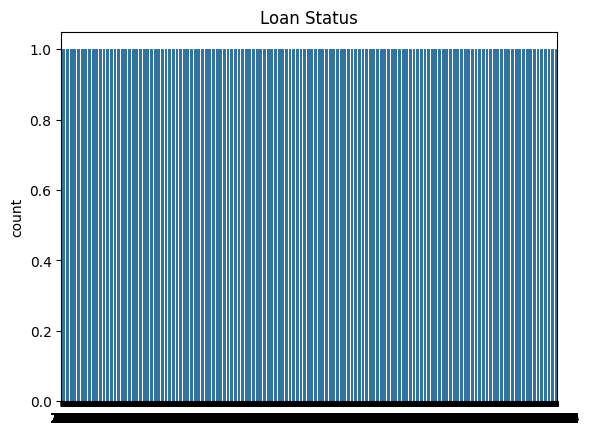

In [10]:
# Loan status
sns.countplot(df['loan_status'])
plt.title('Loan Status')
plt.show()

In [11]:
# datos categoricos
cat=df.select_dtypes(include='object').columns
cat=['person_gender', 'person_education', 'person_home_ownership',
       'loan_intent']

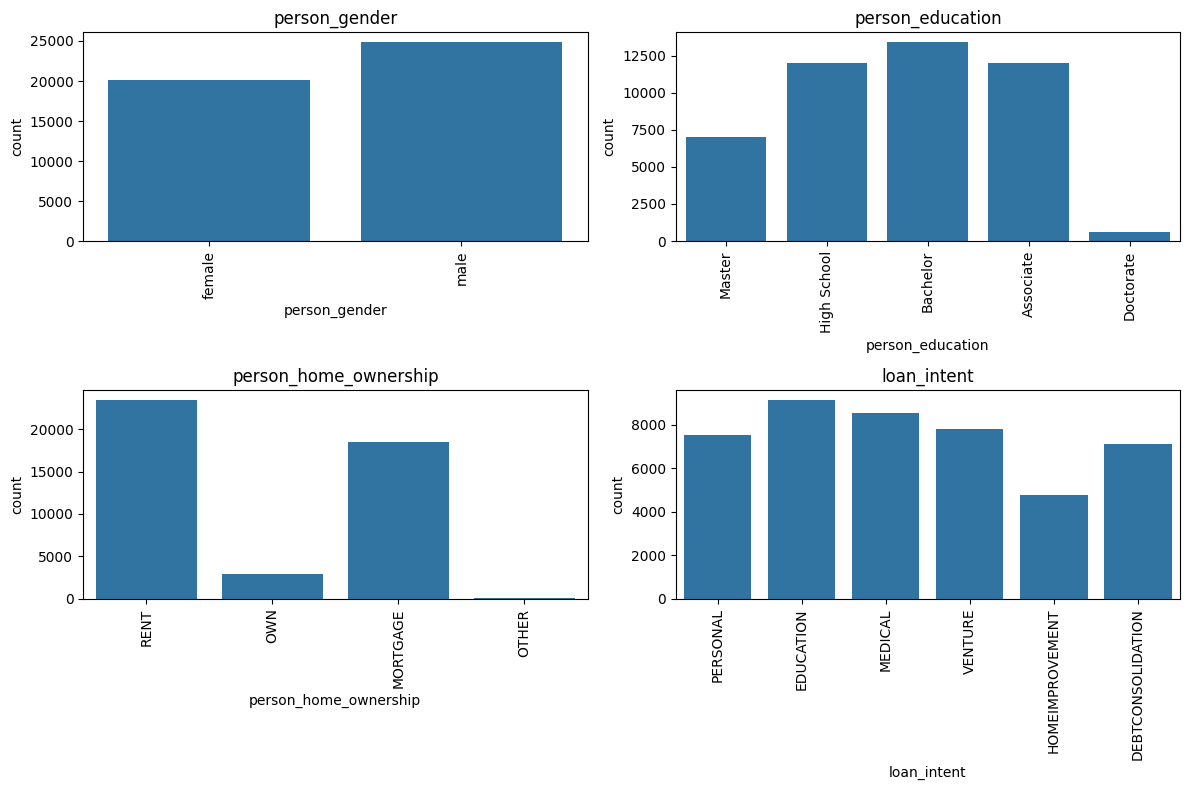

In [12]:
# Crear una figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer la lista 'cat' y asignar cada elemento a una posición en la figura
for i, ax in zip(cat, axs.flat):
    sns.countplot(data=df, x=i, ax=ax)
    ax.set_title(i, fontsize=12)
    ax.tick_params(axis='x', labelrotation=90)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

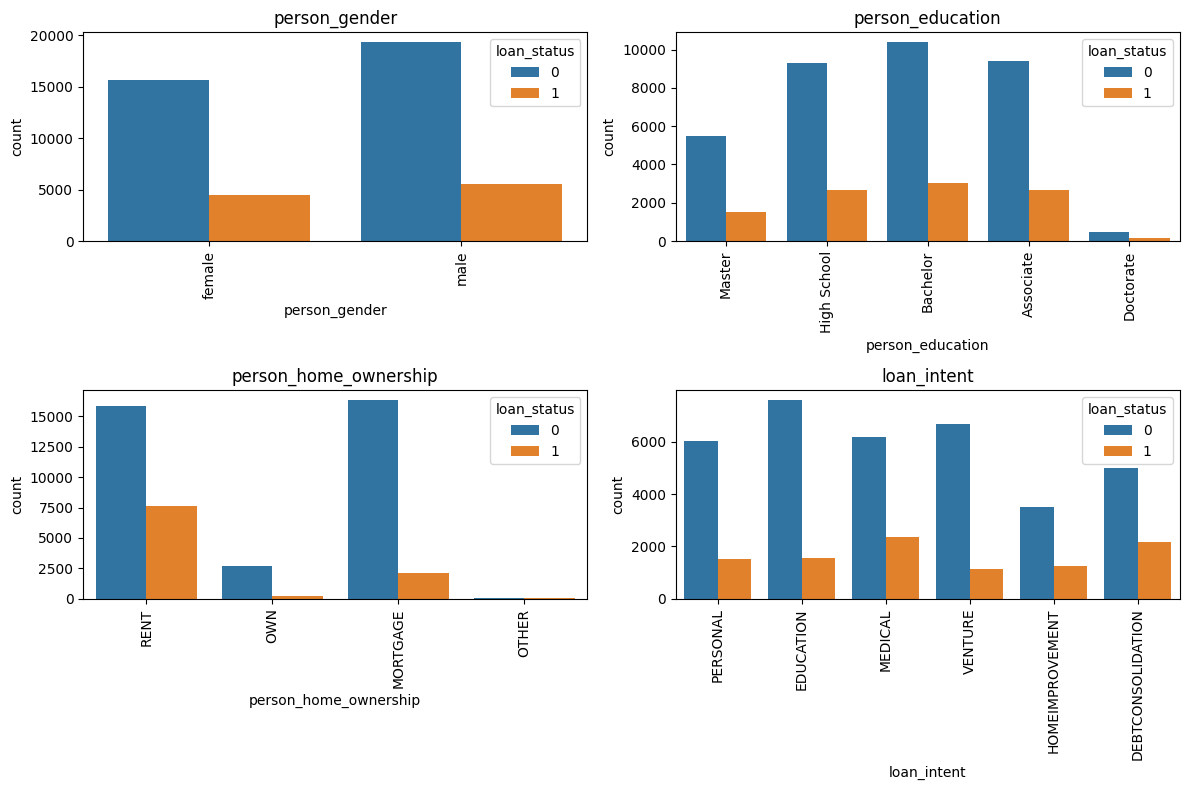

In [13]:
# Crear una figura con 2 filas y 2 columnas
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Recorrer la lista 'cat' y asignar cada elemento a una posición en la figura
for i, ax in zip(cat, axs.flat):
    sns.countplot(data=df, x=i, hue='loan_status',ax=ax)
    ax.set_title(i, fontsize=12)
    ax.tick_params(axis='x', labelrotation=90)

# Ajustar el espacio entre subplots
plt.tight_layout()

# Mostrar la figura
plt.show()

<Figure size 1500x800 with 0 Axes>

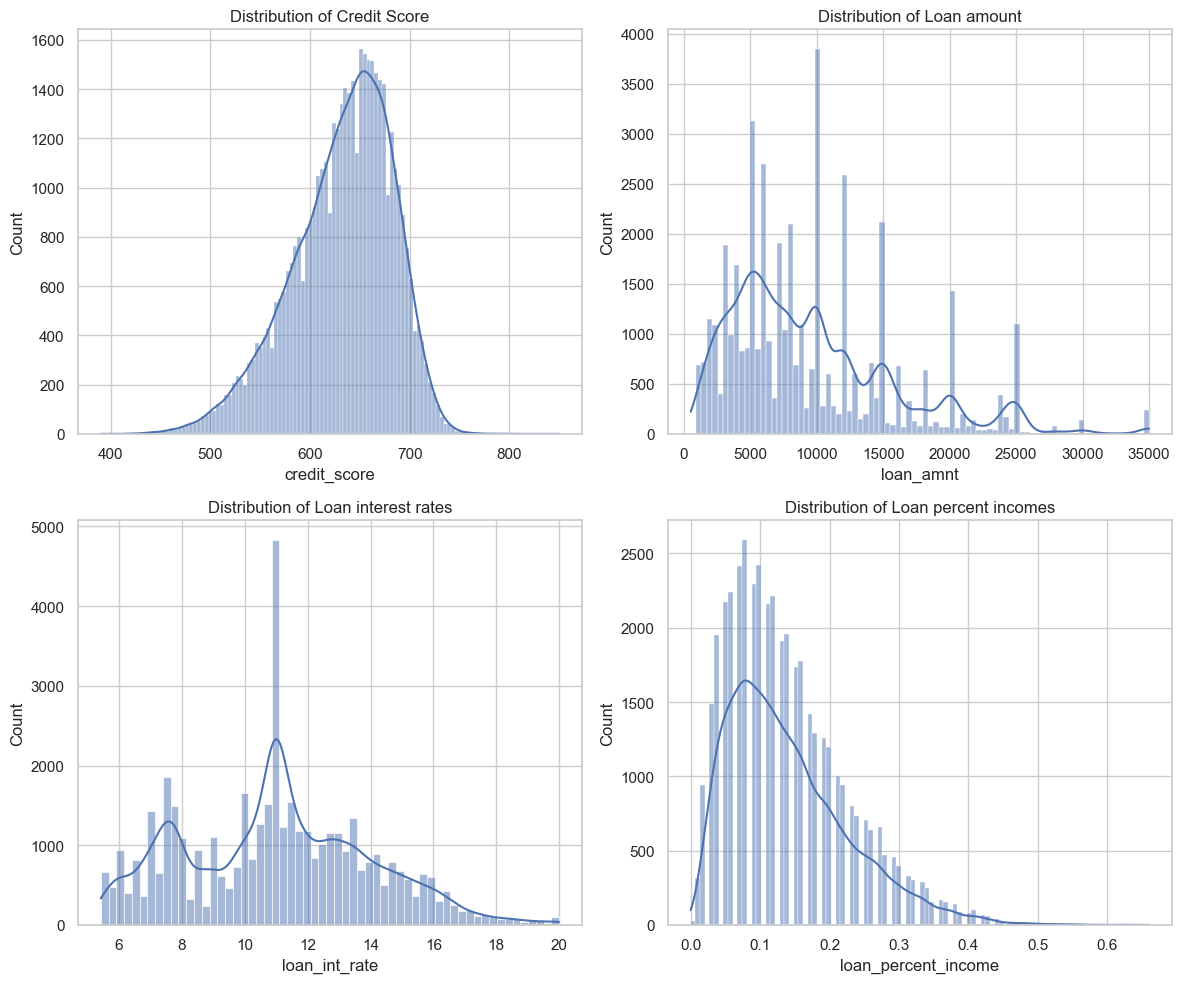

In [14]:
# Histograms to visualize distribution
plt.figure(figsize=(15, 8))
sns.set(style="whitegrid")
fig, axs = plt.subplots(2, 2, figsize=(12, 10))

sns.histplot(df['credit_score'], kde=True, ax=axs[0, 0])
axs[0, 0].set_title('Distribution of Credit Score')

sns.histplot(df['loan_amnt'], kde=True, ax=axs[0, 1])
axs[0, 1].set_title('Distribution of Loan amount')

sns.histplot(df['loan_int_rate'], kde=True, ax=axs[1, 0])
axs[1, 0].set_title('Distribution of Loan interest rates')

sns.histplot(df['loan_percent_income'], kde=True, ax=axs[1, 1])
axs[1, 1].set_title('Distribution of Loan percent incomes')

plt.tight_layout()
plt.show()

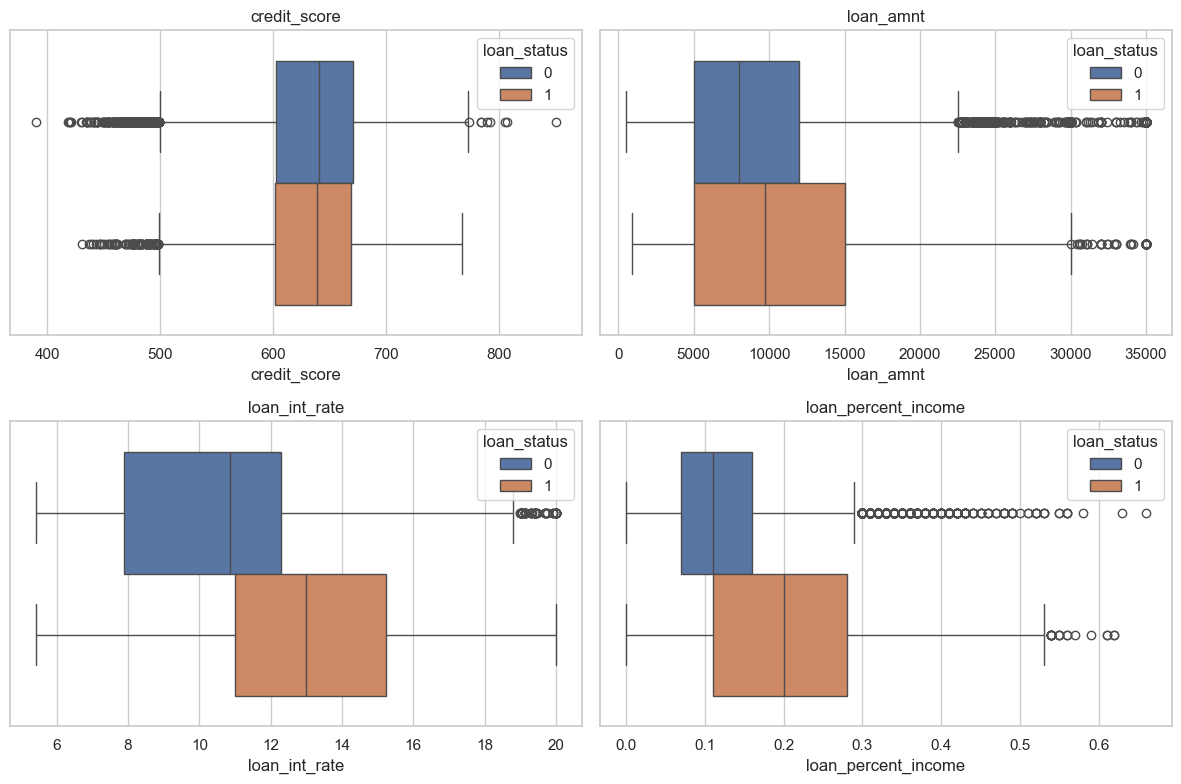

In [15]:
num=['credit_score','loan_amnt','loan_int_rate','loan_percent_income']
fig,axs=plt.subplots(2,2,figsize=(12,8))
for i,ax in zip(num,axs.flat):
    sns.boxplot(data=df,x=i,hue='loan_status',ax=ax)
    ax.set_title(i,fontsize=12)
plt.tight_layout()
plt.show()

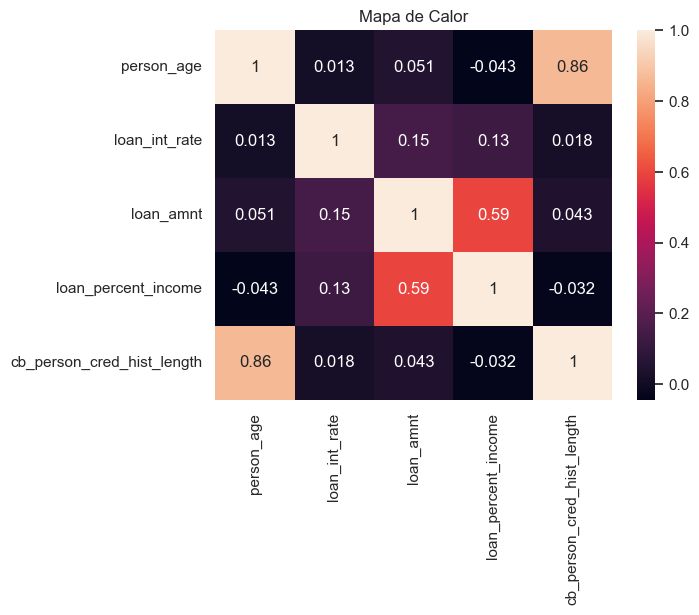

In [16]:
#df[num].corr()
cols = ['person_age', 'loan_int_rate', 'loan_amnt','loan_percent_income', 'cb_person_cred_hist_length'] 
sns.heatmap(df[cols].corr(),annot=True)
plt.title('Mapa de Calor')
plt.show()

In [17]:

Q1 = df[cols].quantile(0.25)
Q3 = df[cols].quantile(0.75)
IQR = Q3 - Q1

df = df[~((df[cols] < (Q1 - 1.5 * IQR)) |(df[cols] > (Q3 + 1.5 * IQR))).any(axis=1)]

**After remove outliers**

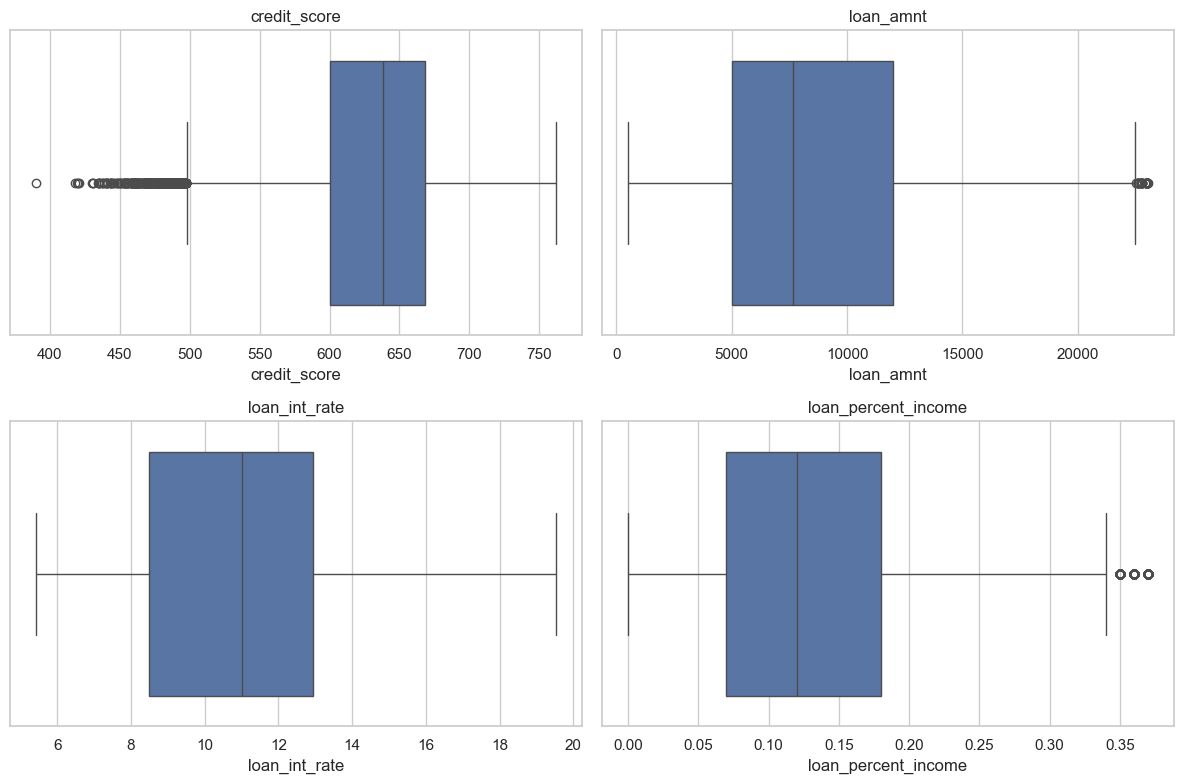

In [18]:
fig,axs=plt.subplots(2,2,figsize=(12,8))
for i,ax in zip(num,axs.flat):
    sns.boxplot(data=df,x=i,ax=ax)
    ax.set_title(i,fontsize=12)
plt.tight_layout()
plt.show()

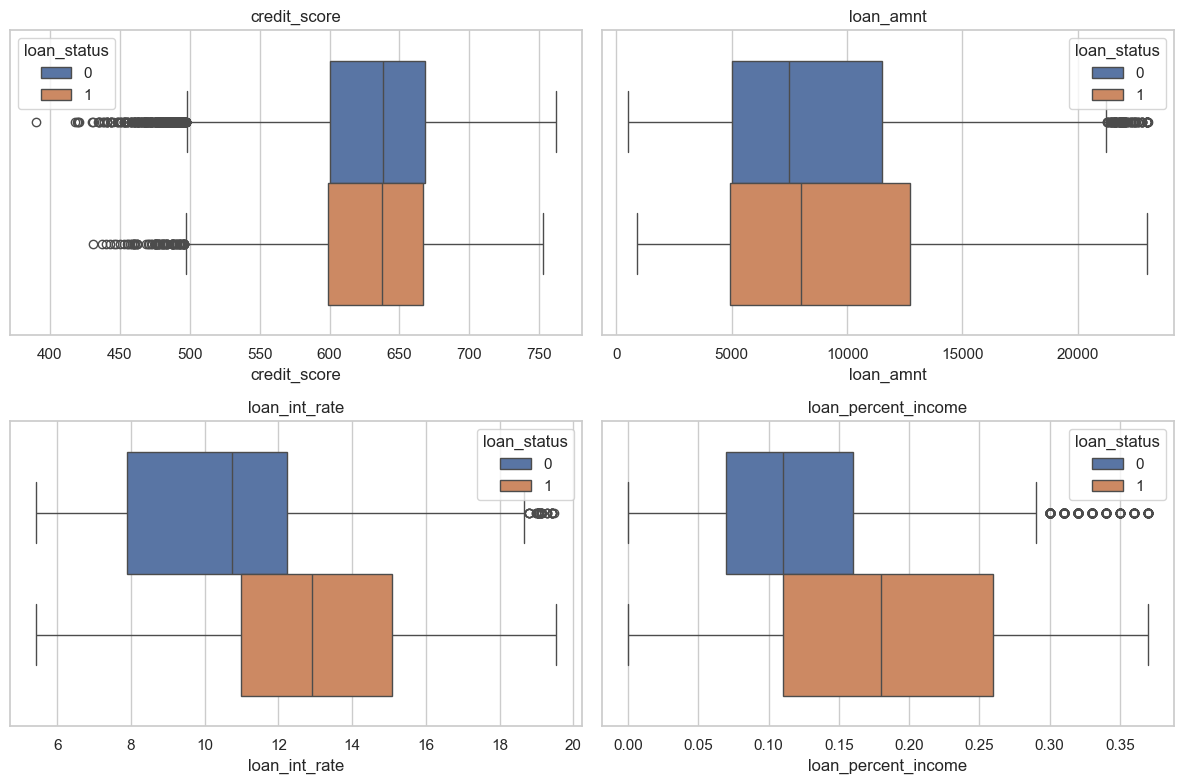

In [19]:
fig,axs=plt.subplots(2,2,figsize=(12,8))
for i,ax in zip(num,axs.flat):
    sns.boxplot(data=df,x=i,hue='loan_status',ax=ax)
    ax.set_title(i,fontsize=12)
plt.tight_layout()
plt.show()

<Figure size 1200x800 with 0 Axes>

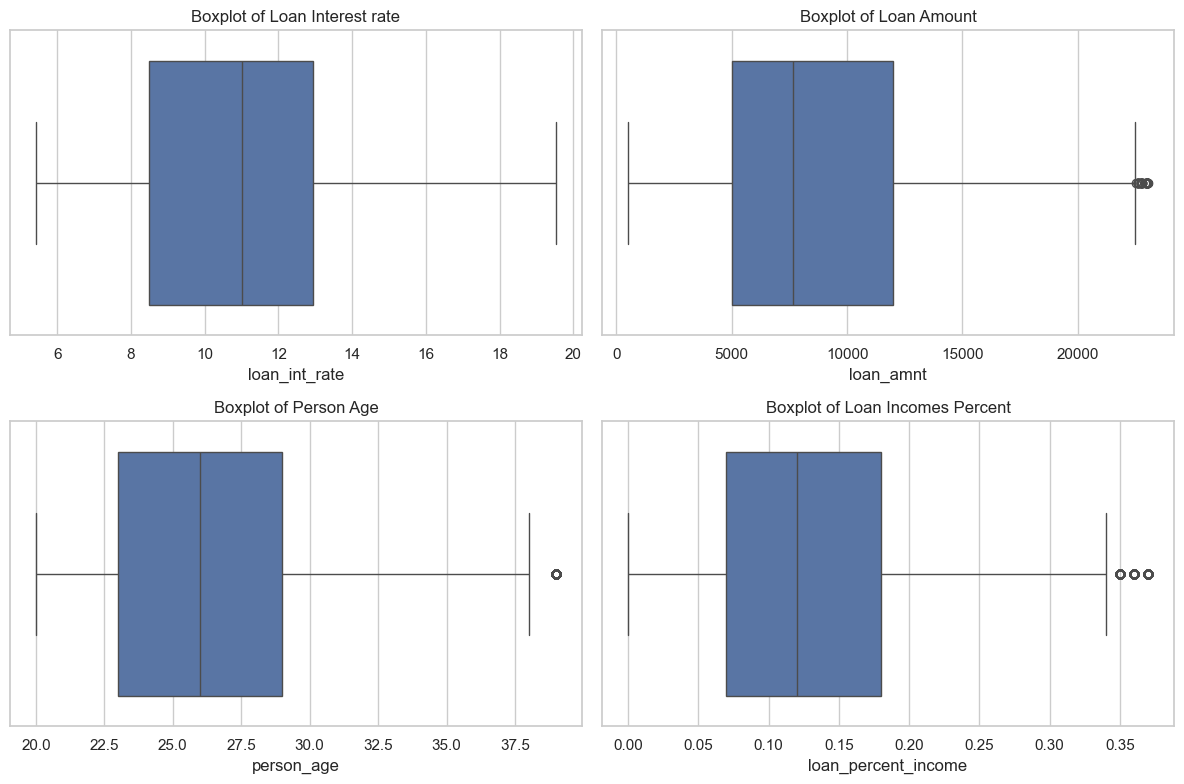

In [20]:
# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))

# Boxplot to visualize outliers
plt.figure(figsize=(12, 8))

plt.subplot(2, 2, 1)
sns.boxplot(x=df['loan_int_rate'])
plt.title('Boxplot of Loan Interest rate')

plt.subplot(2, 2, 2)
sns.boxplot(x=df['loan_amnt'])
plt.title('Boxplot of Loan Amount')

plt.subplot(2, 2, 3)
sns.boxplot(x=df['person_age'])
plt.title('Boxplot of Person Age')

plt.subplot(2, 2, 4)
sns.boxplot(x=df['loan_percent_income'])
plt.title('Boxplot of Loan Incomes Percent')

plt.tight_layout()
plt.show();

In [21]:
print(f"Numero de filas y columnas : \n {df.shape}")

Numero de filas y columnas : 
 (39513, 14)


## **Fase 3: Preprocesamiento de  datos**

In [24]:
le=LabelEncoder()
df['loan_intent']=df['loan_intent'].map(df['loan_intent'].value_counts(normalize=True))
df['person_home_ownership']=df['person_home_ownership'].map(df['person_home_ownership'].value_counts(normalize=True))
df['person_education']=df['person_education'].map(df['person_education'].value_counts(normalize=True))
df['person_gender']=le.fit_transform(df['person_gender'])
df['previous_loan_defaults_on_file']=le.fit_transform(df['previous_loan_defaults_on_file'])

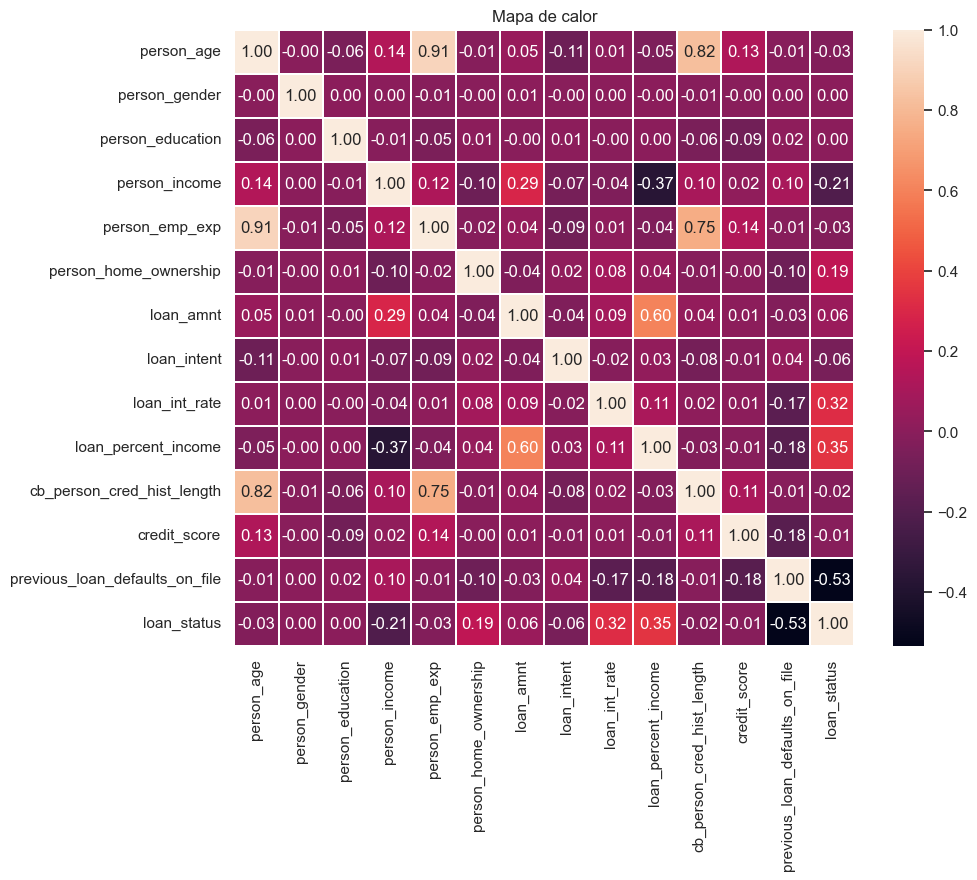

In [25]:
plt.figure(figsize=(10,8))
sns.heatmap(df.corr(),annot=True,fmt='.2f',linewidths=.2)
plt.title('Mapa de calor')
plt.show()

## **Fase 4: División de datos (Train-Test Split)**

In [29]:
X=df.drop(columns=['loan_status'])
y=df['loan_status']
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_test, X_val, y_test, y_val = train_test_split(X_test, y_test, test_size=0.3, random_state=42)

## **Fase 5: Selección del modelo y entrenamiento**

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
rfc=RandomForestClassifier(class_weight='balanced')
param_grid = {
 'n_estimators': [100, 200],
 'max_depth': [None, 5, 10],
 'max_features': ['sqrt', 'log2', None],
 'random_state': [0, 42]
}

# Perform a grid search with cross-validation to find the best hyperparameters
grid_search = GridSearchCV(rfc, param_grid, cv=5)
grid_search.fit(X_train, y_train)
# Print the best hyperparameters
print(grid_search.best_params_)

{'max_depth': None, 'max_features': 'sqrt', 'n_estimators': 200, 'random_state': 42}


In [73]:
rfc = RandomForestClassifier(**grid_search.best_params_)
rfc.fit(X_train, y_train)

RandomForestClassifier(n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score
y_pred = rfc.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 92.79 %


In [74]:
# Predict on the test set
y_pred = rfc.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.94      0.97      0.96      4388
           1       0.88      0.75      0.81      1144

    accuracy                           0.93      5532
   macro avg       0.91      0.86      0.88      5532
weighted avg       0.93      0.93      0.93      5532



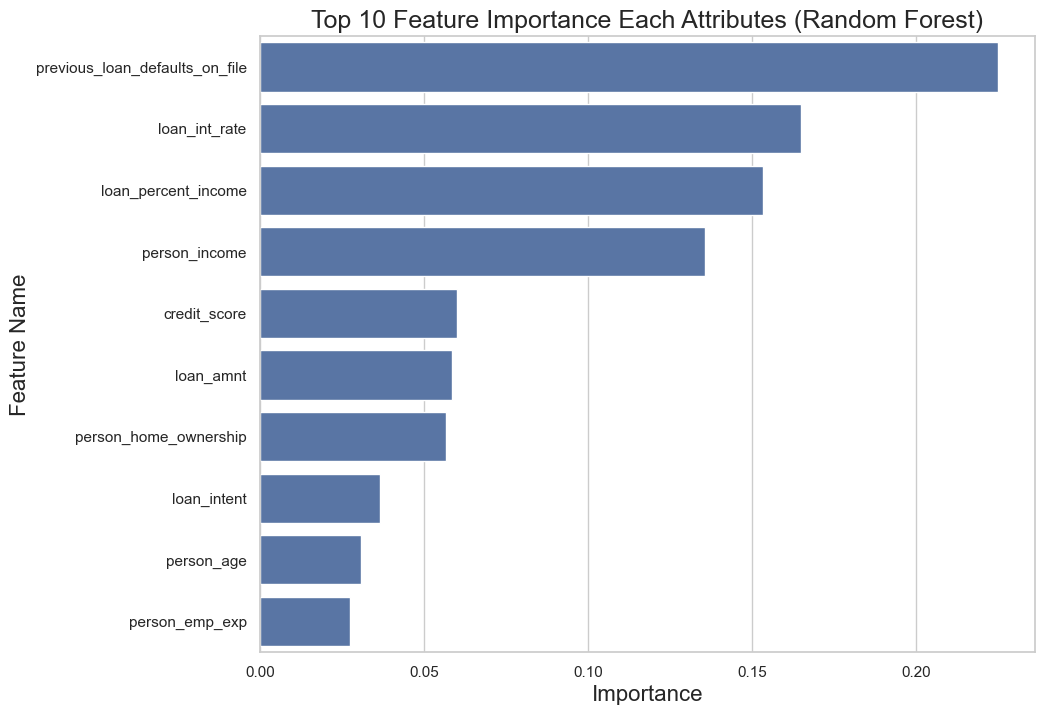

In [76]:
imp_df = pd.DataFrame({
 "Feature Name": X_train.columns,
 "Importance": rfc.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
# Save the plot as a PNG file
plt.savefig('feature_importance.png', format='png', bbox_inches='tight')
plt.show()


In [78]:
import xgboost as xgb
from sklearn.model_selection import RandomizedSearchCV

xgb_clf = xgb.XGBClassifier()

# Define la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'gamma': [0, 0.1, 0.5],
    'subsample': [0.5, 0.8, 1],
    'colsample_bytree': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Define el número de iteraciones aleatorias
n_iter = 20

# Realiza una búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(xgb_clf, param_grid, cv=5, scoring='f1_macro', n_iter=n_iter)
random_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

Mejores hiperparámetros: {'subsample': 0.5, 'reg_lambda': 0.5, 'reg_alpha': 0.1, 'n_estimators': 200, 'max_depth': 7, 'learning_rate': 0.1, 'gamma': 0.1, 'colsample_bytree': 0.8}


In [79]:
xgb = xgb.XGBClassifier(**random_search.best_params_)
xgb.fit(X_train, y_train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.8, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=0.1, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.1, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=200, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)

In [80]:
from sklearn.metrics import accuracy_score
y_pred = xgb.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.13 %


In [81]:
# Predict on the test set
y_pred = xgb.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4388
           1       0.86      0.79      0.83      1144

    accuracy                           0.93      5532
   macro avg       0.90      0.88      0.89      5532
weighted avg       0.93      0.93      0.93      5532



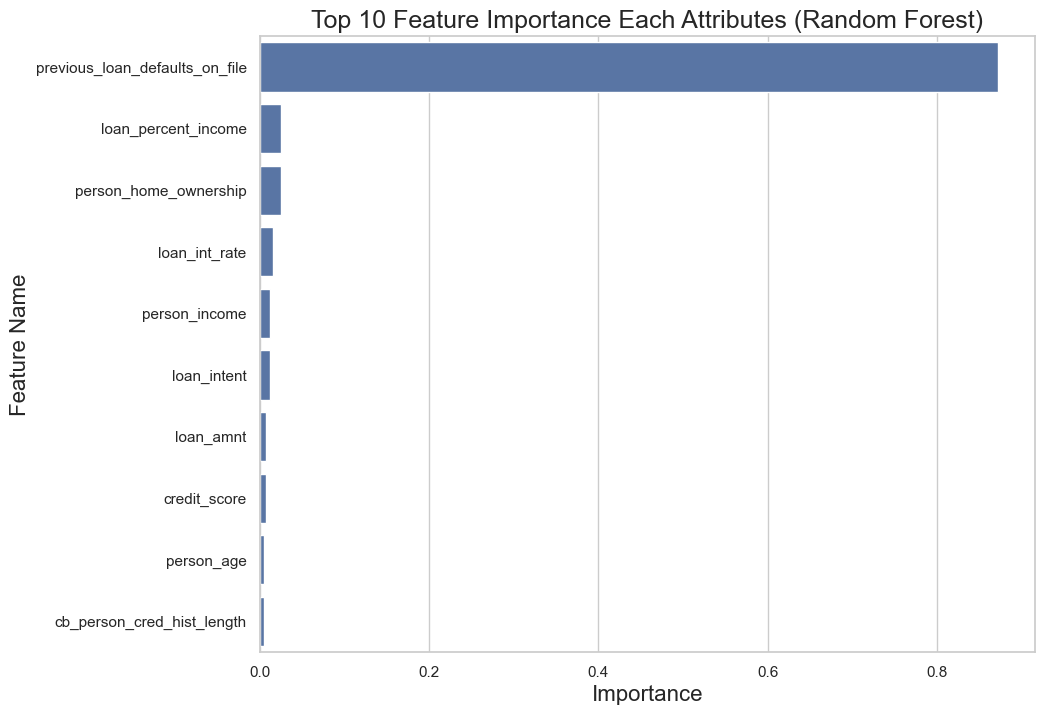

In [82]:
imp_df = pd.DataFrame({
 "Feature Name": X_train.columns,
 "Importance": xgb.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
# Save the plot as a PNG file
plt.savefig('feature_importance.png', format='png', bbox_inches='tight')
plt.show()

In [30]:
import lightgbm as lgb
from sklearn.model_selection import RandomizedSearchCV

lgb_clf = lgb.LGBMClassifier()

# Define la cuadrícula de hiperparámetros a explorar
param_grid = {
    'max_depth': [-1, 3, 5, 7],
    'learning_rate': [0.1, 0.05, 0.01],
    'n_estimators': [50, 100, 200],
    'num_leaves': [31, 62, 127],
    'colsample_bytree': [0.5, 0.8, 1],
    'subsample': [0.5, 0.8, 1],
    'reg_alpha': [0, 0.1, 0.5],
    'reg_lambda': [0, 0.1, 0.5]
}

# Define el número de iteraciones aleatorias
n_iter = 20

# Realiza una búsqueda aleatoria con validación cruzada
random_search = RandomizedSearchCV(lgb_clf, param_grid, cv=5, scoring='f1_macro', n_iter=n_iter)
random_search.fit(X_train, y_train)

# Imprime los mejores hiperparámetros
print("Mejores hiperparámetros:", random_search.best_params_)

[LightGBM] [Info] Number of positive: 5208, number of negative: 20080
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.002633 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 1115
[LightGBM] [Info] Number of data points in the train set: 25288, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205947 -> initscore=-1.349528
[LightGBM] [Info] Start training from score -1.349528
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain

In [34]:
lgb_clf = lgb.LGBMClassifier(**random_search.best_params_)
lgb_clf.fit(X_train, y_train)

[LightGBM] [Info] Number of positive: 6509, number of negative: 25101
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.002762 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 1114
[LightGBM] [Info] Number of data points in the train set: 31610, number of used features: 13
[LightGBM] [Info] [binary:BoostFromScore]: pavg=0.205916 -> initscore=-1.349722
[LightGBM] [Info] Start training from score -1.349722
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain, best gain: -inf
[LightGBM] [Warning] No further splits with positive gain

LGBMClassifier(colsample_bytree=1, max_depth=7, n_estimators=200,
               num_leaves=127, reg_alpha=0.1, reg_lambda=0, subsample=0.5)

In [35]:
from sklearn.metrics import accuracy_score
y_pred = lgb_clf.predict(X_test)
print("Accuracy Score :", round(accuracy_score(y_test, y_pred)*100 ,2), "%")

Accuracy Score : 93.35 %


In [36]:
# Predict on the test set
y_pred = lgb_clf.predict(X_test)

# Print classification report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.95      0.97      0.96      4388
           1       0.88      0.79      0.83      1144

    accuracy                           0.93      5532
   macro avg       0.91      0.88      0.89      5532
weighted avg       0.93      0.93      0.93      5532



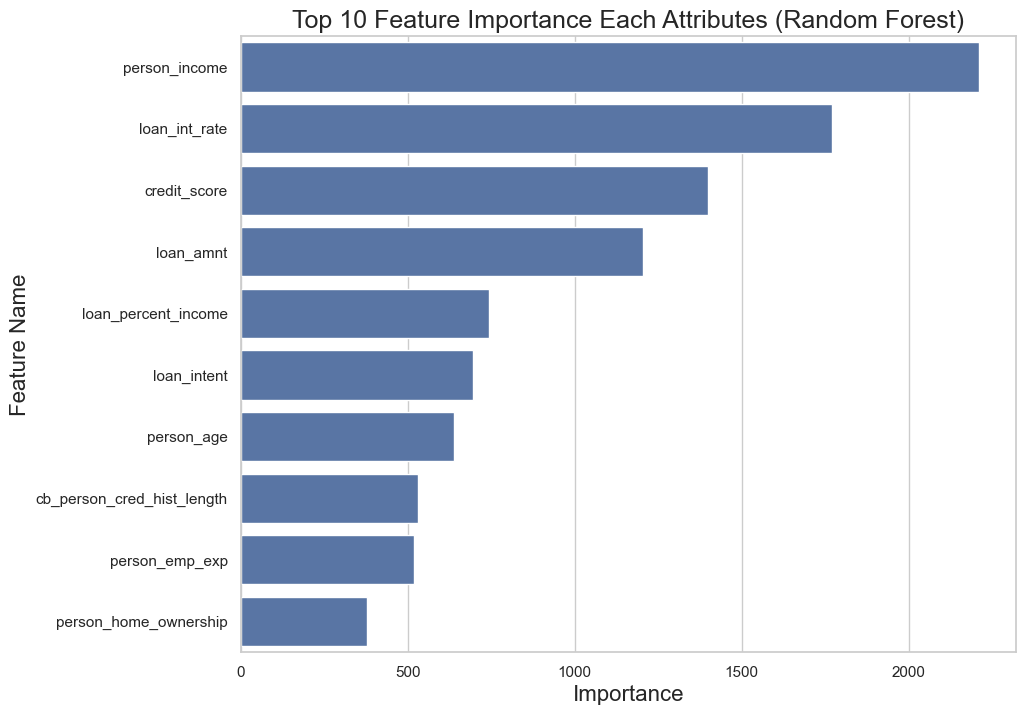

In [37]:
imp_df = pd.DataFrame({
 "Feature Name": X_train.columns,
 "Importance": lgb_clf.feature_importances_
})
fi = imp_df.sort_values(by="Importance", ascending=False)
fi2 = fi.head(10)
plt.figure(figsize=(10,8))
sns.barplot(data=fi2, x='Importance', y='Feature Name')
plt.title('Top 10 Feature Importance Each Attributes (Random Forest)', fontsize=18)
plt.xlabel ('Importance', fontsize=16)
plt.ylabel ('Feature Name', fontsize=16)
# Save the plot as a PNG file
plt.savefig('feature_importance.png', format='png', bbox_inches='tight')
plt.show()